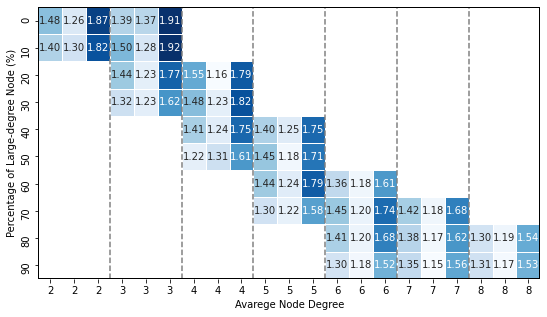

In [7]:
import csv
import glob
import os
import re
import seaborn as sns
import numpy as np
import matplotlib.pylab as plt

# uniform_data = np.random.rand(10, 12)
# ax = sns.heatmap(uniform_data, linewidth=0.5)
# plt.show()



def get_time_trace(file_handler):
    reader = csv.DictReader(file_handler)
    for row in reader:
        if 'GIN_compute_one_graph' in row['Profile Summary']:
            #print(row)
            for ele in row:
                if isinstance(ele, str):
                    continue
                time_trace = row[ele]
    return time_trace


heat_map_array = np.zeros((30, 10))
mask = np.zeros_like(heat_map_array)


for filename in glob.glob('./v1/opencl_summary_degree_*.csv'):
    #print(filename)
    f1 = open(filename, 'r')
    f3 = open('./v3/' + filename[5:], 'r')
    f5 = open('./v5/' + filename[5:], 'r')

    l = re.findall(r'\d+', filename)
    #print(l)

    trace1 = get_time_trace(f1)
    trace3 = get_time_trace(f3)
    trace5 = get_time_trace(f5)
    speedup_5_over_1 = float(trace1[3]) / float(trace5[3])
    speedup_3_over_1 = float(trace1[3]) / float(trace3[3])
    speedup_5_over_3 = float(trace3[3]) / float(trace5[3])

    #print(trace1)
    #print(trace5)

    degree = int(l[1])
    percent = int(l[2])

    heat_map_array[(degree - 1) * 3][int(percent/10)] = speedup_3_over_1 ## v3's speed up over v1
    heat_map_array[(degree - 1) * 3 + 1][int(percent/10)] = speedup_5_over_3 ## v5's speed up over v3
    heat_map_array[(degree - 1) * 3 + 2][int(percent/10)] = speedup_5_over_1 ## v5's speed up over v1


x_axis_labels = []
for i in range(0, 30):
    j = int(i / 3) + 1
    x_axis_labels.append(j)
y_axis_labels = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]

for i in range(0, 30):
    for j in range(0, 10):
        if heat_map_array[i][j] == 0:
            mask[i][j] = True


plt.figure(figsize = (9,5))

#cmap = sns.color_palette("ch:start=.2,rot=-.3", as_cmap=True)
cmap = sns.color_palette("Blues", as_cmap=True)

ax = sns.heatmap(heat_map_array.transpose(), linewidth=0.5, linecolor='white', annot=True, fmt='.2f', mask=mask.transpose(), cmap=cmap, xticklabels=x_axis_labels, yticklabels=y_axis_labels, cbar=False)
ax.set_xlabel('Avarege Node Degree')
ax.set_ylabel('Percentage of Large-degree Node (%)')

ax.set_xlim(3, 24)
#ax.set_xticks(range(2, 9))

ax.vlines([6, 9, 12, 15, 18, 21], *ax.get_ylim(), linestyles='dashed', color='gray')

ax.axhline(y=0, color='k',linewidth=2)
ax.axhline(y=heat_map_array.shape[1], color='k',linewidth=2)
ax.axvline(x=3, color='k',linewidth=2)
ax.axvline(x=24, color='k',linewidth=2)

plt.savefig("random_graph.pdf")
plt.savefig("random_graph.png", format='png', dpi=1000)

plt.show()
    
